Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey (2).csv
📋 Available columns: ['SN', 'Total Feedback Given', 'Total Configured', 'Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course']
✅ Detected feedback column: Questions


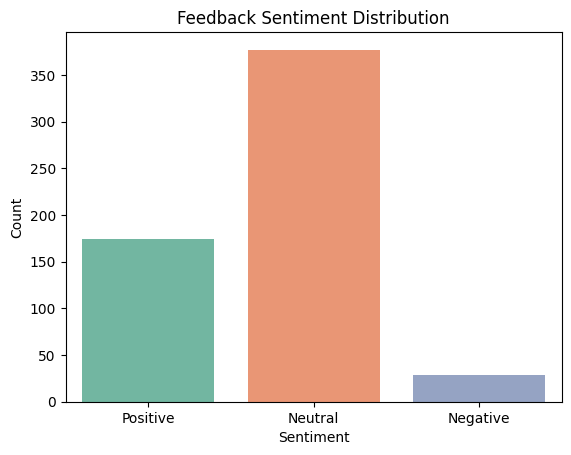

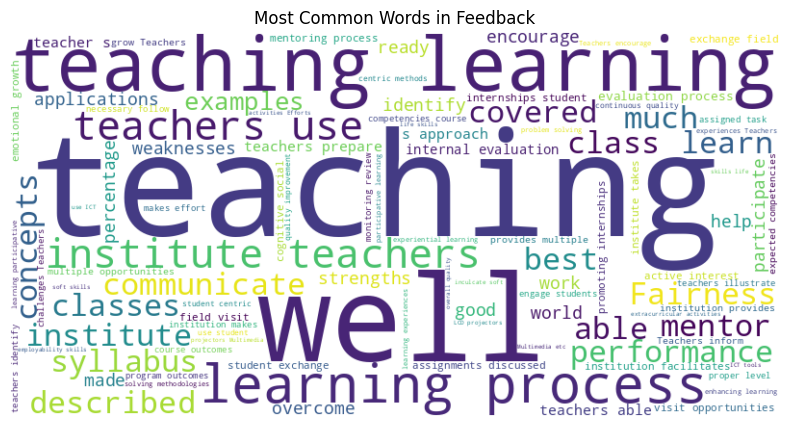


ℹ️ No 'Suggestions' column found.


In [17]:
# 📦 Install necessary libraries
!pip install textblob wordcloud

# 📚 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from google.colab import files

# 📤 Upload CSV file
uploaded = files.upload()

# 📄 Read CSV with correct encoding
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, encoding='cp1252')

# 🔍 Display and clean column names
df.columns = [col.strip() for col in df.columns]
print("📋 Available columns:", df.columns.tolist())

# 🔍 Automatically detect feedback column (using 'Questions' for text feedback)
feedback_candidates = [col for col in df.columns if 'questions' in col.lower()]
if feedback_candidates:
    feedback_column = feedback_candidates[0]
    print(f"✅ Detected feedback column: {feedback_column}")
else:
    raise ValueError("❌ No feedback column found. Please check your CSV column names.")

# 🧹 Drop rows with missing feedback
df.dropna(subset=[feedback_column], inplace=True)

# 🔎 Sentiment analysis
df['Sentiment Score'] = df[feedback_column].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment Label'] = df['Sentiment Score'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)

# 📊 Sentiment distribution plot
sns.countplot(data=df, x='Sentiment Label', palette='Set2')
plt.title("Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 📊 Overall experience rating histogram (if available)
rating_candidates = [col for col in df.columns if 'experience' in col.lower() or 'rating' in col.lower()]
if rating_candidates:
    rating_col = rating_candidates[0]
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
    sns.histplot(df[rating_col], bins=5, kde=True)
    plt.title("Overall Experience Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

# ☁️ Word cloud for feedback
feedback_text = " ".join(df[feedback_column].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Feedback")
plt.show()

# 💡 Show sample suggestions if present
suggestion_candidates = [col for col in df.columns if 'suggestion' in col.lower()]
if suggestion_candidates:
    suggestion_col = suggestion_candidates[0]
    print("\n📌 Sample Suggestions:\n")
    print(df[suggestion_col].dropna().sample(min(5, len(df[suggestion_col].dropna()))).to_string(index=False))
else:
    print("\nℹ️ No 'Suggestions' column found.")